In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
#from sklearn import *
import seaborn as sns
from sklearn import tree 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Train the deep neural network

In [51]:
df = pd.read_csv("./S1.csv")

In [73]:
## The basic framework of neural network
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.25) 

sc = StandardScaler()
X_transform = sc.fit_transform(X_train)
sc2 = StandardScaler()
# y scale to [0,1]

mms = MinMaxScaler()
Y_transform = mms.fit_transform(y_train.reshape(-1, 1) )

class ProgressBar(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    self.draw_progress_bar(epoch + 1, EPOCHS)

  def draw_progress_bar(self, cur, total, bar_len=50):
    cur_len = int(cur / total * bar_len)
    sys.stdout.write("\r")
    sys.stdout.write("[{:<{}}] {}/{}".format("=" * cur_len, bar_len, cur, total))
    sys.stdout.flush()

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.xlabel('epoch')
  plt.ylabel('metric - MSE')
  plt.plot(hist['epoch'], hist['mse'], label='tr')
  plt.plot(hist['epoch'], hist['val_mse'], label = 'va')
  plt.grid(True)
  plt.legend()
  
  plt.figure()
  plt.xlabel('epoch')
  plt.ylabel('metric - MAE')
  plt.plot(hist['epoch'], hist['mae'], label='tr')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'va')
  plt.grid(True)
  plt.legend()
    
logdir = '.\callbacks'
output_model_file = os.path.join(logdir,"study.h5")
tensorboard =  keras.callbacks.TensorBoard(logdir)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-5,patience=50)

callbacks=[ProgressBar()
           ,early_stop]

EPOCHS = 50000

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(X.shape[1],)) ) 

model.add(tf.keras.layers.Dense(128, activation="relu") )
model.add(tf.keras.layers.Dense(256, activation="relu") )
model.add(tf.keras.layers.Dense(128, activation="relu") )
model.add(tf.keras.layers.Dense(128, activation="relu") )
model.add(tf.keras.layers.Dense(1, activation="relu") ) 
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001)
             ,loss = 'mse' 
             ,metrics=[['mae', 'mse']]
             )

In [74]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 118)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               15232     
_________________________________________________________________
dense_40 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_41 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 129       
Total params: 97,793
Trainable params: 97,793
Non-trainable params: 0
__________________________________________________

In [75]:
history = model.fit(
  X_transform,Y_transform,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  batch_size= 32, validation_freq= 1 ,callbacks=callbacks)

Train on 7404 samples, validate on 1851 samples
Epoch 1/50000
7404/7404 [==============================] - 1s 136us/sample - loss: 0.0222 - mae: 0.0930 - mse: 0.0222 - val_loss: 0.0117 - val_mae: 0.0710 - val_mse: 0.0117
Epoch 2/50000
7404/7404 [==============================] - 1s 101us/sample - loss: 0.0096 - mae: 0.0658 - mse: 0.0096 - val_loss: 0.0102 - val_mae: 0.0650 - val_mse: 0.0102
Epoch 3/50000
7404/7404 [==============================] - 1s 99us/sample - loss: 0.0086 - mae: 0.0618 - mse: 0.0086 - val_loss: 0.0093 - val_mae: 0.0626 - val_mse: 0.0093
Epoch 4/50000
7404/7404 [==============================] - 1s 93us/sample - loss: 0.0080 - mae: 0.0597 - mse: 0.0080 - val_loss: 0.0094 - val_mae: 0.0610 - val_mse: 0.0094
Epoch 5/50000
7404/7404 [==============================] - 1s 97us/sample - loss: 0.0076 - mae: 0.0579 - mse: 0.0076 - val_loss: 0.0089 - val_mae: 0.0598 - val_mse: 0.0089
Epoch 6/50000
7404/7404 [==============================] - 1s 105us/sample - loss: 0.0073 

Epoch 48/50000
7404/7404 [==============================] - 1s 97us/sample - loss: 0.0043 - mae: 0.0393 - mse: 0.0043 - val_loss: 0.0070 - val_mae: 0.0488 - val_mse: 0.0070
Epoch 49/50000
7404/7404 [==============================] - 1s 97us/sample - loss: 0.0043 - mae: 0.0393 - mse: 0.0043 - val_loss: 0.0071 - val_mae: 0.0491 - val_mse: 0.0071
Epoch 50/50000
7404/7404 [==============================] - 1s 97us/sample - loss: 0.0042 - mae: 0.0390 - mse: 0.0042 - val_loss: 0.0071 - val_mae: 0.0494 - val_mse: 0.0071
Epoch 51/50000
7404/7404 [==============================] - 1s 101us/sample - loss: 0.0042 - mae: 0.0387 - mse: 0.0042 - val_loss: 0.0075 - val_mae: 0.0514 - val_mse: 0.0075
Epoch 52/50000
7404/7404 [==============================] - 1s 133us/sample - loss: 0.0042 - mae: 0.0391 - mse: 0.0042 - val_loss: 0.0070 - val_mae: 0.0491 - val_mse: 0.0070
Epoch 53/50000
7404/7404 [==============================] - 1s 102us/sample - loss: 0.0042 - mae: 0.0391 - mse: 0.0042 - val_loss: 0.

7404/7404 [==============================] - 1s 84us/sample - loss: 0.0034 - mae: 0.0333 - mse: 0.0034 - val_loss: 0.0068 - val_mae: 0.0452 - val_mse: 0.0068
Epoch 96/50000
7404/7404 [==============================] - 0s 62us/sample - loss: 0.0034 - mae: 0.0329 - mse: 0.0034 - val_loss: 0.0066 - val_mae: 0.0443 - val_mse: 0.0066
Epoch 97/50000
7404/7404 [==============================] - 1s 84us/sample - loss: 0.0034 - mae: 0.0334 - mse: 0.0034 - val_loss: 0.0066 - val_mae: 0.0437 - val_mse: 0.0066
Epoch 98/50000
7404/7404 [==============================] - 1s 93us/sample - loss: 0.0033 - mae: 0.0330 - mse: 0.0033 - val_loss: 0.0068 - val_mae: 0.0450 - val_mse: 0.0068
Epoch 99/50000
7404/7404 [==============================] - 1s 96us/sample - loss: 0.0034 - mae: 0.0332 - mse: 0.0034 - val_loss: 0.0068 - val_mae: 0.0449 - val_mse: 0.0068
Epoch 100/50000
7404/7404 [==============================] - 1s 95us/sample - loss: 0.0034 - mae: 0.0333 - mse: 0.0034 - val_loss: 0.0068 - val_mae: 0

7404/7404 [==============================] - 0s 67us/sample - loss: 0.0029 - mae: 0.0295 - mse: 0.0029 - val_loss: 0.0067 - val_mae: 0.0430 - val_mse: 0.0067
Epoch 143/50000
7404/7404 [==============================] - 1s 70us/sample - loss: 0.0030 - mae: 0.0298 - mse: 0.0030 - val_loss: 0.0067 - val_mae: 0.0440 - val_mse: 0.0067
Epoch 144/50000
7404/7404 [==============================] - 1s 70us/sample - loss: 0.0030 - mae: 0.0301 - mse: 0.0030 - val_loss: 0.0069 - val_mae: 0.0440 - val_mse: 0.0069
Epoch 145/50000
7404/7404 [==============================] - 0s 62us/sample - loss: 0.0031 - mae: 0.0314 - mse: 0.0031 - val_loss: 0.0077 - val_mae: 0.0482 - val_mse: 0.0077
Epoch 146/50000
7404/7404 [==============================] - 0s 67us/sample - loss: 0.0030 - mae: 0.0300 - mse: 0.0030 - val_loss: 0.0066 - val_mae: 0.0427 - val_mse: 0.0066
Epoch 147/50000
7404/7404 [==============================] - 1s 70us/sample - loss: 0.0031 - mae: 0.0303 - mse: 0.0031 - val_loss: 0.0066 - val_ma

7404/7404 [==============================] - 0s 66us/sample - loss: 0.0021 - mae: 0.0259 - mse: 0.0021 - val_loss: 0.0058 - val_mae: 0.0391 - val_mse: 0.0058
Epoch 190/50000
7404/7404 [==============================] - 1s 70us/sample - loss: 0.0021 - mae: 0.0255 - mse: 0.0021 - val_loss: 0.0057 - val_mae: 0.0383 - val_mse: 0.0057
Epoch 191/50000
7404/7404 [==============================] - 1s 69us/sample - loss: 0.0021 - mae: 0.0252 - mse: 0.0021 - val_loss: 0.0057 - val_mae: 0.0395 - val_mse: 0.0057
Epoch 192/50000
7404/7404 [==============================] - 1s 71us/sample - loss: 0.0020 - mae: 0.0250 - mse: 0.0020 - val_loss: 0.0057 - val_mae: 0.0390 - val_mse: 0.0057
Epoch 193/50000
7404/7404 [==============================] - 1s 70us/sample - loss: 0.0021 - mae: 0.0254 - mse: 0.0021 - val_loss: 0.0057 - val_mae: 0.0390 - val_mse: 0.0057
Epoch 194/50000
7404/7404 [==============================] - 1s 68us/sample - loss: 0.0020 - mae: 0.0245 - mse: 0.0020 - val_loss: 0.0056 - val_ma

7404/7404 [==============================] - 1s 74us/sample - loss: 0.0018 - mae: 0.0229 - mse: 0.0018 - val_loss: 0.0059 - val_mae: 0.0385 - val_mse: 0.0059
Epoch 237/50000
7404/7404 [==============================] - 1s 68us/sample - loss: 0.0020 - mae: 0.0244 - mse: 0.0020 - val_loss: 0.0056 - val_mae: 0.0375 - val_mse: 0.0056
Epoch 238/50000
7404/7404 [==============================] - 0s 66us/sample - loss: 0.0018 - mae: 0.0235 - mse: 0.0018 - val_loss: 0.0054 - val_mae: 0.0367 - val_mse: 0.0054
Epoch 239/50000
7404/7404 [==============================] - 1s 86us/sample - loss: 0.0018 - mae: 0.0234 - mse: 0.0018 - val_loss: 0.0055 - val_mae: 0.0370 - val_mse: 0.0055
Epoch 240/50000
7404/7404 [==============================] - 1s 93us/sample - loss: 0.0018 - mae: 0.0232 - mse: 0.0018 - val_loss: 0.0056 - val_mae: 0.0379 - val_mse: 0.0056
Epoch 241/50000
7404/7404 [==============================] - 1s 100us/sample - loss: 0.0018 - mae: 0.0232 - mse: 0.0018 - val_loss: 0.0058 - val_m

7404/7404 [==============================] - 0s 66us/sample - loss: 0.0018 - mae: 0.0222 - mse: 0.0018 - val_loss: 0.0056 - val_mae: 0.0377 - val_mse: 0.0056
Epoch 284/50000
7404/7404 [==============================] - 0s 67us/sample - loss: 0.0017 - mae: 0.0222 - mse: 0.0017 - val_loss: 0.0055 - val_mae: 0.0373 - val_mse: 0.0055
Epoch 285/50000
7404/7404 [==============================] - 1s 68us/sample - loss: 0.0018 - mae: 0.0223 - mse: 0.0018 - val_loss: 0.0057 - val_mae: 0.0374 - val_mse: 0.0057
Epoch 286/50000
7404/7404 [==============================] - 1s 71us/sample - loss: 0.0017 - mae: 0.0217 - mse: 0.0017 - val_loss: 0.0055 - val_mae: 0.0374 - val_mse: 0.0055
Epoch 287/50000
7404/7404 [==============================] - 1s 68us/sample - loss: 0.0018 - mae: 0.0225 - mse: 0.0018 - val_loss: 0.0056 - val_mae: 0.0372 - val_mse: 0.0056
Epoch 288/50000
7404/7404 [==============================] - 1s 72us/sample - loss: 0.0017 - mae: 0.0220 - mse: 0.0017 - val_loss: 0.0056 - val_ma

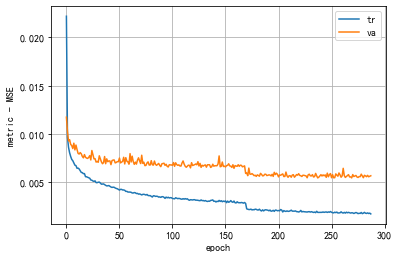

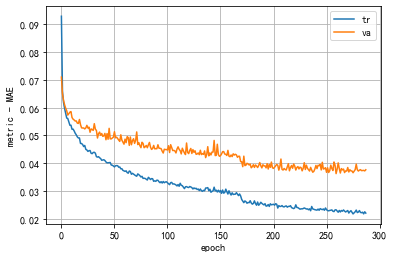

In [76]:
plot_history(history)

mae 5.567640322635964
R2 0.8715308740832991


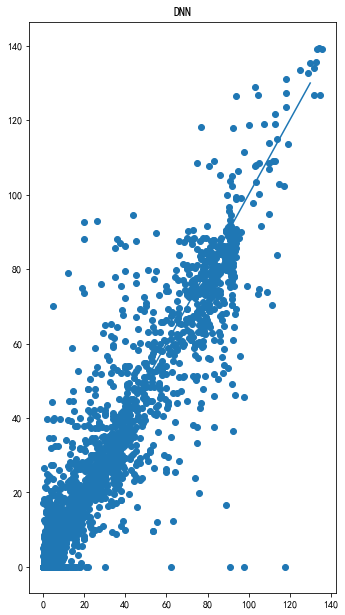

In [77]:
y_pred = model.predict(sc.transform(X_test))
y_pred= mms.inverse_transform(y_pred)
y_test = y_test.reshape(-1,1)
mae = y_pred-y_test
print("mae",np.abs(mae).reshape(1,-1).mean())

from matplotlib import pyplot as plt
plt.scatter(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("R2",r2_score(y_test,y_pred))
plt.title('DNN')
fig = plt.gcf( )
fig.set_size_inches(5.5, 10.5)

ll = np.linspace(0,130,1200)
ll_x = ll
ll_y = ll
plt.plot(ll_x,ll_y)
plt.show( )

###  Parameter optimization (using additional library optunaas for a longer time)

###  The trained model, take DNN under S1 descriptor as an example

In [78]:
save_model = tf.keras.experimental.load_from_saved_model("./S1model")
#save_model.predict(X).shape
save_model.summary()

Model: "sequential_418"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_418 (Flatten)        (None, 118)               0         
_________________________________________________________________
dense_2105 (Dense)           (None, 251)               29869     
_________________________________________________________________
dense_2106 (Dense)           (None, 153)               38556     
_________________________________________________________________
dense_2107 (Dense)           (None, 239)               36806     
_________________________________________________________________
dense_2108 (Dense)           (None, 124)               29760     
_________________________________________________________________
dense_2109 (Dense)           (None, 1)                 125       
Total params: 135,116
Trainable params: 135,116
Non-trainable params: 0
______________________________________________

### Residual analysis

0.9361781128924711
RMSE 7.345803863368909
MAE 3.731645200334191


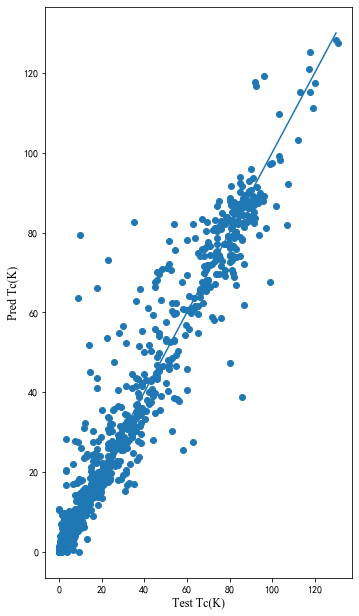

In [79]:
## take S2model for a example
model = tf.keras.experimental.load_from_saved_model("./S2model")
df =S2
from sklearn.model_selection import train_test_split
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.1,random_state=2022)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_transform = sc.fit_transform(X_train)
sc2 = StandardScaler()

from sklearn.preprocessing import MinMaxScaler

y_pred = model.predict(sc.transform(X_test))

from matplotlib import pyplot as plt
plt.scatter(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print(r2_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error, mean_absolute_error


np.sqrt(mean_squared_error(y_test,y_pred))


print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


mean_absolute_error(y_test,y_pred)

print("MAE",mean_absolute_error(y_test,y_pred))

font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 12,
                }
#plt.title('Deeplearning')
fig = plt.gcf( )
fig.set_size_inches(5.5, 10.5)
plt.xlabel("Test Tc(K)",font2)

plt.ylabel("Pred Tc(K)",font2)

ll = np.linspace(0,130,1200)
ll_x = ll
ll_y = ll
plt.plot(ll_x,ll_y)
#plt.savefig('DNN回归.jpg', dpi=300)
plt.show( )

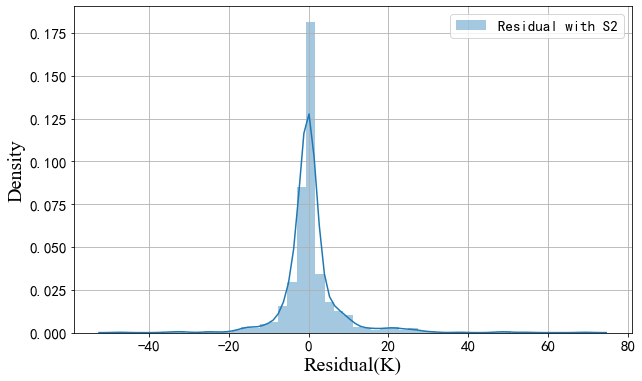

In [80]:
error = y_pred.T - y_test.T
error = pd.DataFrame(error)
fig = plt.figure(figsize = (10,6))
#ax1 = fig.add_subplot(2,1,1)  # 创建子图1
#ax1.scatter(s.index, s.values)
#plt.grid()
# 绘制数据分布图
font3 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 20,
                }
ax = fig.add_subplot(1,1,1)  # 创建子图2
#s.hist(bins=30,alpha = 0.5,ax = ax)
sns.distplot(error,ax = ax,bins = 50)
plt.legend(["Residual with S2"],fontsize =15)
plt.xlabel('Residual(K)',font3)
plt.ylabel('Density',font3)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x',labelsize=15)
#plt.title('Pred of VH')
#plt.savefig('误差分析.jpg', dpi=300)
plt.grid()
#plt.savefig("S2 residual", dpi=300,bbox_inches ="tight")